<a href="https://colab.research.google.com/github/RanaRaushan/Face_recog/blob/master/Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mtcnn
!pip install keras_vggface


In [0]:
import pickle
import random
import os
from numpy import array

from matplotlib import pyplot as plt

from mtcnn.mtcnn import MTCNN
from numpy import asarray
from PIL.Image import fromarray

import tensorflow as tf
from tensorflow.python.client import device_lib
tf.test.gpu_device_name()
# to change current woking directory

os.chdir("drive/My Drive/Colab Notebooks")
!pwd

/content/drive/My Drive/Colab Notebooks


In [0]:
from matplotlib.pyplot import Rectangle
import cv2

base_dir =(os.path.abspath(""))
img_dir = os.path.join(base_dir, "data")
categories = []
training_data = []

def extract_face(img_path, imgsize=224):
    try:
        img_resize = (imgsize, imgsize)
        detector = MTCNN()
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(image)
        plt.imshow(image)
        # print(image.shape)
        ax = plt.gca()
        for result in faces:
            x, y, w, h = result['box']
            get_face_roi = image[y:y + h, x:x + w]
            get_face_image = fromarray(get_face_roi)
            get_face_image = get_face_image.resize(img_resize)
            face_array = asarray(get_face_image)
            # print(face_array.shape)
            rect = Rectangle((x, y), w, h, fill=False, color='red')
            ax.add_patch(rect)
            plt.show()
            plt.imshow(get_face_image)
        plt.show()
        return face_array
    except Exception as e:
        print(e)
# frame = "test3.jpg"
# # frame  = "https://scontent.fccu1-1.fna.fbcdn.net/v/t1.0-9/56407501_2335533746681352_7937931137395982336_o.jpg?_nc_cat=105&_nc_sid=e3f864&_nc_ohc=AAKZyEkYLeIAX-INF8C&_nc_ht=scontent.fccu1-1.fna&oh=4cec43c5d038aee3595890302157e48d&oe=5F060F5C"
# extract_face(frame)



In [0]:

def create_training_data():
    img_size = 224
    for root, dirs, files in os.walk(img_dir):
        categories.append(dirs)
    categories_filter = list(filter(None, categories))
    print(categories_filter)
    # enum_catergories = enumerate(categories)
    for label_name, category in enumerate(categories_filter[0]):
        path_to_img = os.path.join(img_dir, category)
        for img_no, img in enumerate(os.listdir(path_to_img)):
            print("======================================================================>", img_no)
            img_path = os.path.join(path_to_img, img)
            try:
                face_array = extract_face(img_path, img_size)
                training_data.append([face_array, label_name])
                print(label_name, "working")
            except Exception as e:
                pass
                print(label_name, e, "Invalid photo")

    # print(training_data)
    random.shuffle(training_data)
    x = []
    y = []
    for feature, label in training_data:
        x.append(feature)
        y.append(label)
    x = array(x)
    x = array(x)
    y = array(y)

    pickle_out = open("x.pickle", "wb")
    pickle.dump(x, pickle_out)
    pickle_out.close()

    pickle_out = open("y.pickle", "wb")
    pickle.dump(y, pickle_out)
    pickle_out.close()
if __name__ == '__main__':
    create_training_data()

In [0]:
import cv2
import pickle
from mtcnn.mtcnn import MTCNN
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine
from numpy import asarray,any
import os
from PIL.Image import fromarray
from IPython.display import Image
from google.colab.patches import cv2_imshow

def main_face_recog():
    !pwd
    base_dir = (os.path.abspath(""))
    img_dir = os.path.join(base_dir, "data")
    print(img_dir)
    catergories = []
    for root, dirs, files in os.walk(img_dir):
        catergories.append(dirs)
    # print(catergories)
    catergories = catergories[0]
    X = pickle.load(open("x.pickle", "rb"))
    Y = pickle.load(open("y.pickle", "rb"))
    def get_model_scores(data,imgsize=224):
        samples = asarray(data, 'float32')
        # label_name = data[1]
        # prepare the data for the model
        samples = preprocess_input(samples, version=2)
        # create a vggface model object
        model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
        # model = VGGFace(model='resnet50')
        samples = samples.reshape(1, imgsize, imgsize, -1)
        # perform prediction
        # print(model.predict(samples))
        return model.predict(samples)

    def identify_face(curr_img_score):
        try:
            for key, value in enumerate(X):
                if any(value==None):
                    continue
                model_scores = []
                model_scores.append(curr_img_score)
                model_scores.append(get_model_scores(value))
                threshold_value = cosine(model_scores[0], model_scores[1])
                print('threshold value', threshold_value)
                if threshold_value <= 0.4:
                    label_id = Y[key]
                    return catergories[label_id]
            else:
                return "Unknown"
        except Exception as e:
            print(e)
    # cap = cv2.VideoCapture(take_photo())
    while True:
        # cap = cv2.VideoCapture(take_photo())
        # Capture frame-by-frame
        try:
            # frame = take_photo()
            # display(Image(frame))
            # ret,frame = cap.read()
            # print(ret)
            frame = "test3.jpg"
            # frame  = "https://scontent.fccu1-1.fna.fbcdn.net/v/t1.0-9/56407501_2335533746681352_7937931137395982336_o.jpg?_nc_cat=105&_nc_sid=e3f864&_nc_ohc=AAKZyEkYLeIAX-INF8C&_nc_ht=scontent.fccu1-1.fna&oh=4cec43c5d038aee3595890302157e48d&oe=5F060F5C"
            
            # detector = MTCNN()
            # faces = detector.detect_faces(frame)
            # for result in faces:
            #     img_resize = (224,224)
            #     x, y, w, h = result['box']
            #     get_face_roi = frame[y:y + h, x:x + w]
            #     get_face_image = fromarray(get_face_roi)
            #     get_face_image = get_face_image.resize(img_resize)
            #     face_array = asarray(get_face_image)


            # curr_img_score = get_model_scores(face_array)
            curr_img_score = get_model_scores(extract_face(frame))
            unique_id = identify_face(curr_img_score)
            # for face in faces:
            #     x, y, w, h = face['box']
            #     font = cv2.FONT_HERSHEY_SIMPLEX
            #     name = unique_id
            #     color = (255, 0, 255)
            #     thickness = 4
            #     cv2.putText(frame, name, (x, y+100), font, 1, color, thickness, cv2.LINE_AA)
            #     end_coord_x = x+w
            #     end_coord_y = y+h
            #     rect_color = (255, 0, 0)
            #     rect_thickness = 4
            #     cv2.rectangle(frame, (x, y), (end_coord_x, end_coord_y), rect_color, rect_thickness)
            #     cv2_imshow(frame)
            #     if cv2.waitKey(20) & 0xFF == ord('q'):
            #         break
            return unique_id

            # return labels[id_]
            #Display the resulting frame

        except Exception as e:
            print(e)

    # When everything done, release the capture
    # cap.release()
    # cv2.destroyAllWindows()



In [0]:
# from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import pandas as pd

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

# https://docs.google.com/spreadsheets/d/1uCX0fIhSUjsLML5uQ-dhFJPaDeSR4ohwlOuhWQCWRgY/edit?usp=sharing

# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '1uCX0fIhSUjsLML5uQ-dhFJPaDeSR4ohwlOuhWQCWRgY'
SAMPLE_RANGE_NAME = 'A:B'

def read_stu_deatls():
    """Shows basic usage of the Sheets API.
    Prints values from a sample spreadsheet.
    """
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])

    if not values:
        print('No data found.')
    else:
        stu_read = pd.DataFrame(values[1:])
    return stu_read
if __name__ == '__main__':
    read_stu_deatls()

In [0]:
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import pandas as pd

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '18t2bhgjUkDOLirMYfY0Cw0QsD0V6OwOxPNU7gHrFu6s'
SAMPLE_RANGE_NAME = 'A:E'

def main_read_data():
    """Shows basic usage of the Sheets API.
    Prints values from a sample spreadsheet.
    """
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])

    if not values:
        print('No data found.')
    else:
        df_read = pd.DataFrame(values[1:])
    return df_read



if __name__ == '__main__':
    main_read_data()

In [0]:
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow,Flow
from google.auth.transport.requests import Request
import os
import pickle



def main_out(df):

    # change this by your sheet ID
    online_attend_sheet = '18t2bhgjUkDOLirMYfY0Cw0QsD0V6OwOxPNU7gHrFu6s'

    # change the range if needed
    SAMPLE_RANGE_NAME = 'A1:AA1000'


    def Create_Service(client_secret_file, api_service_name, api_version, *scopes):
        global service
        SCOPES = [scope for scope in scopes[0]]
        # print(SCOPES)

        cred = None

        if os.path.exists('token_write.pickle'):
            with open('token_write.pickle', 'rb') as token:
                cred = pickle.load(token)

        if not cred or not cred.valid:
            if cred and cred.expired and cred.refresh_token:
                cred.refresh(Request())
            else:
                flow = InstalledAppFlow.from_client_secrets_file(client_secret_file, SCOPES)
                cred = flow.run_local_server()

            with open('token_write.pickle', 'wb') as token:
                pickle.dump(cred, token)

        try:
            service = build(api_service_name, api_version, credentials=cred)
            print(api_service_name, 'service created successfully')
            # return service
        except Exception as e:
            print(e)
            # return None


    # change 'my_json_file.json' by your downloaded JSON file.
    Create_Service('credentials.json', 'sheets', 'v4', ['https://www.googleapis.com/auth/spreadsheets'])


    def Export_Data_To_Sheets():

        response_date = service.spreadsheets().values().append(
            spreadsheetId=online_attend_sheet,
            valueInputOption='RAW',
            range=SAMPLE_RANGE_NAME,
            body=dict(
                majorDimension='ROWS',
                values=df.T.reset_index(drop=True).T.values.tolist())
        )
        response_date.execute()
        # print('Sheet successfully Updated')


    Export_Data_To_Sheets()






/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/data


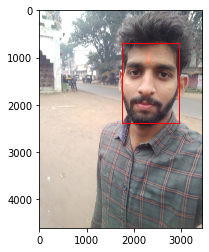

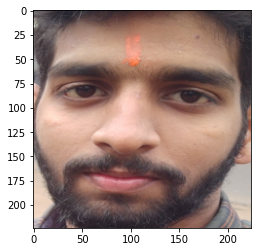

threshold value 0.8920413926243782
threshold value 0.8593200594186783
threshold value 0.2990225553512573


In [0]:
if __name__ == '__main__':
    unq_id = main_face_recog()
def use_val_in_notebook(unq_id):
    return unq_id

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
import numpy as np
a =[]
X = pickle.load(open("x.pickle", "rb"))
Y = pickle.load(open("y.pickle", "rb"))

print(Y)

[0 2 2 1 0 2 2 1 0 0 2 1 2 2 2 1 1 0 2 1 2 0 2 1 2 0 1 1 2 1 1 1 0 2 1 1 2
 0 0 1 1 0 2 0 1 0 2 1 1 1 1 2 2 1 0 0 0 1 0 2 2 0 2 0 1 1 2 2 0 2 2 0 2 2
 0 0 1 1 0 2 0 0 2 1 0 0 2 2 0 2 0 0 1 0 2 2 2 1 0 2 2 1 2 1 0 1 1 1 2 0 2
 1 2 2 1 1 1 0 2 2 0 2 0 2 1 0 1 2 0 2 1 1 1 0 2 1 1 1 2 1 2 2 1 0 0 2 1 1
 1 2 2 0 0 2 2 0 1 2 1 2 2 1 1 1 0 1 2 0 0 1 2 2 1 0 1 0 0 0 1 1 1 0 0 0 2
 0 0 2 2 0 1 0 0 2 0 0 0 0 2 2 0 1 0 0 1 0 1 2 1 0 0 1 1 2 1 1 0 0 0 1 2 2
 2 1 1 2 1 1 2 2 1 1 0 2 0 2 0 0 0 0 0 0 2 1 1 2]
